In [2]:
%matplotlib inline  
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt 
from collections import Counter
import math
from collections import Counter
import numpy as np
from scipy.special import comb
import itertools as it
%load_ext line_profiler
from imp import reload
import itertools as it
import pandas as pd
import seaborn as sns
import sys
sys.path.insert(0, '../mallows kendall')
import mallows_kendall as mk
import cego_lop as cego

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


# References
- http://www.spotseven.de/wp-content/papercite-data/pdf/zaef14c.pdf
- https://dl.acm.org/doi/pdf/10.1145/2576768.2598282  
- https://pubsonline.informs.org/doi/10.1287/ijoc.1120.0506
- https://link.springer.com/article/10.1007/s11721-015-0106-x
- http://iridia.ulb.ac.be/supp/IridiaSupp2015-004/index.html#Scenarios
- instances LOLIB: http://grafo.etsii.urjc.es/optsicom/lolib/#instances
- bayesian opt tutorial: https://arxiv.org/pdf/1012.2599.pdf
- VEGO package: https://cran.r-project.org/web/packages/CEGO/CEGO.pdf

  
  falta encontrar donde habia uno con el LOP
  
# LOP instance generator
  The instances $M$ follow this distribution $M_\phi[i,j]$
  $$M_\phi[i,j] = h(j-i+1,\phi) - h(j-i,\phi),$$ where $$h(k,\phi)=k/(1-\phi^k).$$
  
Taking different values of $\phi$ we controll the uniformity of $M$:
  
  

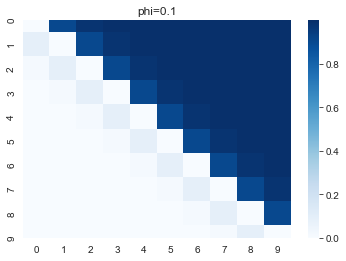

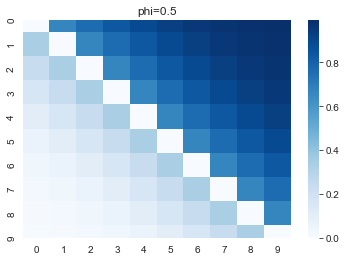

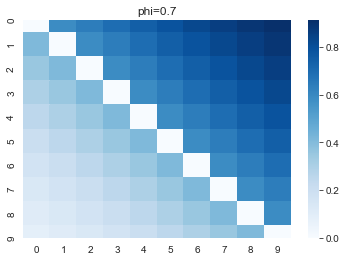

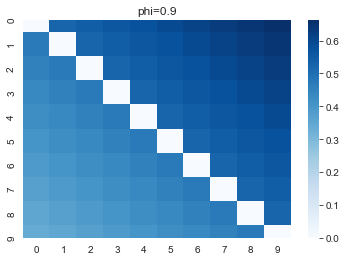

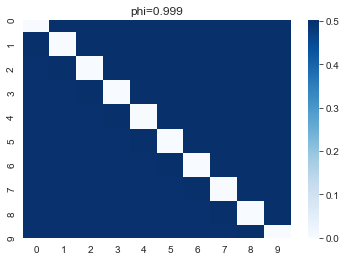

In [49]:
def h(k,phi):
  if (1-phi**k) == 0 : 
    return 0
  return k/(1-phi**k)
  #h(k,\phi)=k/(1-\phi^k)
def mij(i,j,phi):
  return h(j-i+1,phi) - h(j-i,phi)
      #h(j-i+1,\phi) - h(j-i,\phi)
n = 10
for phi in [0.1,0.5,0.7,0.9,0.999]:
  M = np.zeros((n,n))
  for i in range(n):
    for j in range(i+1,n):
      M[i,j] = mij(i,j,phi)
      M[j,i] = 1-M[i,j]
  g = sns.heatmap(M, cmap="Blues")
  g.set_title("phi="+str(phi))
  plt.show()

# running experimtns
How to run one experiment with a particular parameter configuration

In [19]:

reload(cego)
n = 10
m_max = 400
repe = 0 
#m_ini = 10
phi_instance = 0.9
budgetGA = 100

cego.run_and_save(n,repe,phi_instance, budgetGA,m_max=m_max)


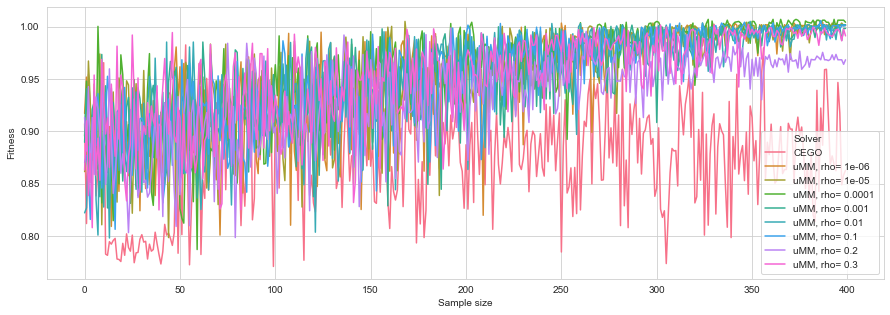

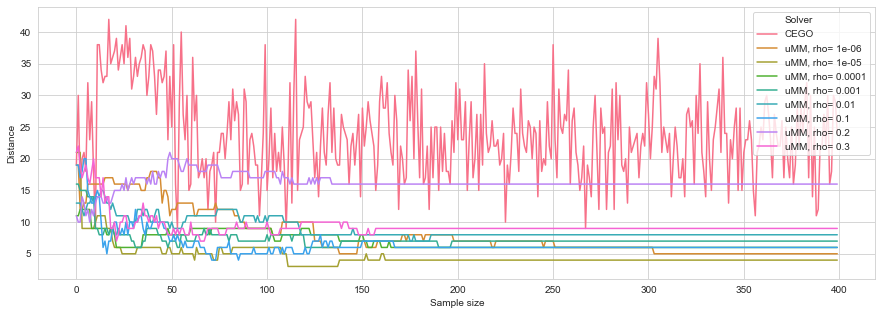

In [20]:
df = pd.read_pickle('pickles/pickLocal.pkl')#pick275670.pkl
color_variable = 'Solver'
y_variables = ['Fitness','Distance']
palette = sns.color_palette("husl", len(df[color_variable].drop_duplicates()))
for y_variable in y_variables:
    plt.figure(figsize=(15,5))
    sns.lineplot(x='Sample size',y=y_variable,hue='Solver',data=df, palette=palette)
    plt.show()

# Plot the results 

In [21]:
df = pd.concat([pd.read_pickle("pickles/"+f) for f in listdir("pickles") if (f.endswith(".pkl")and "Local" not in f)] )
df.head()


Fitness Problem Solver  Sample size  repe  Distance      run_time  rho  \
0  0.910130     LOP   CEGO            0     3        20  11759.767238  NaN   
1  0.891536     LOP   CEGO            1     3        18  11759.767238  NaN   
2  0.810963     LOP   CEGO            2     3        30  11759.767238  NaN   
3  0.815224     LOP   CEGO            3     3        30  11759.767238  NaN   
4  0.885725     LOP   CEGO            4     3        20  11759.767238  NaN   

   phi_estim  phi_sample  best_known  worst_known  phi_instance  budgetGA   n  
0        NaN         NaN      5163.0       3837.0           0.9       100  10  
1        NaN         NaN      5163.0       3837.0           0.9       100  10  
2        NaN         NaN      5163.0       3837.0           0.9       100  10  
3        NaN         NaN      5163.0       3837.0           0.9       100  10  
4        NaN         NaN      5163.0       3837.0           0.9       100  10

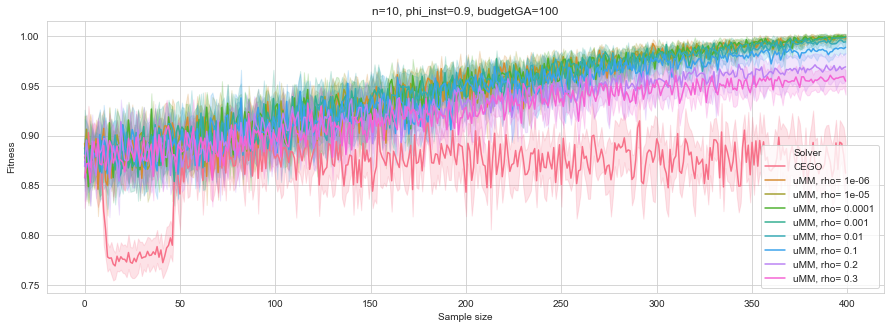

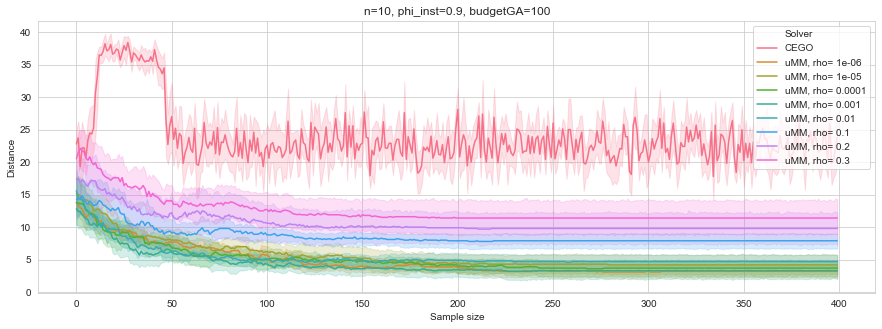

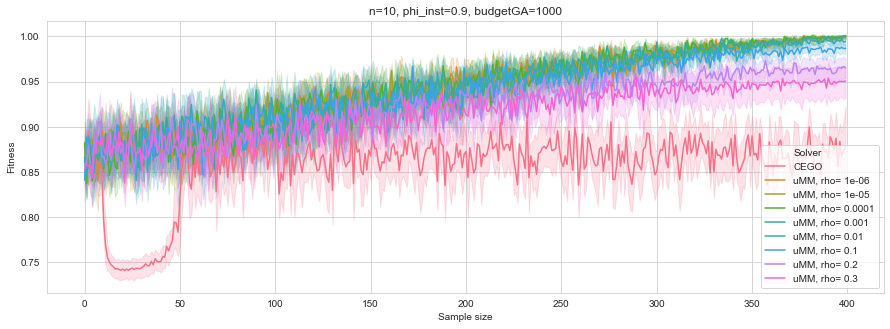

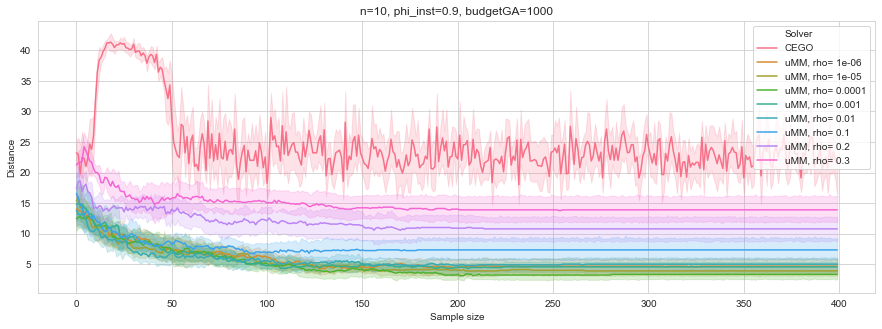

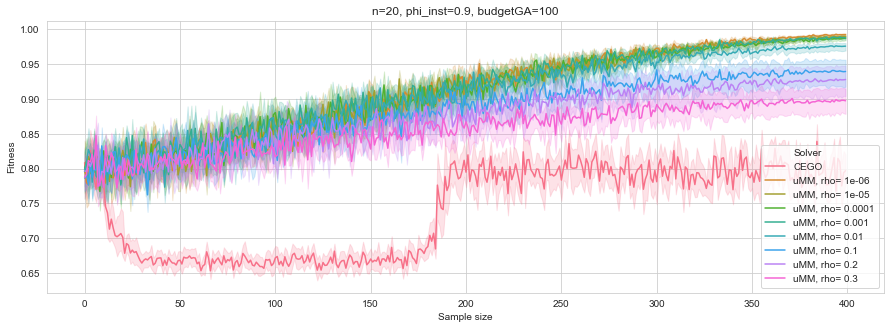

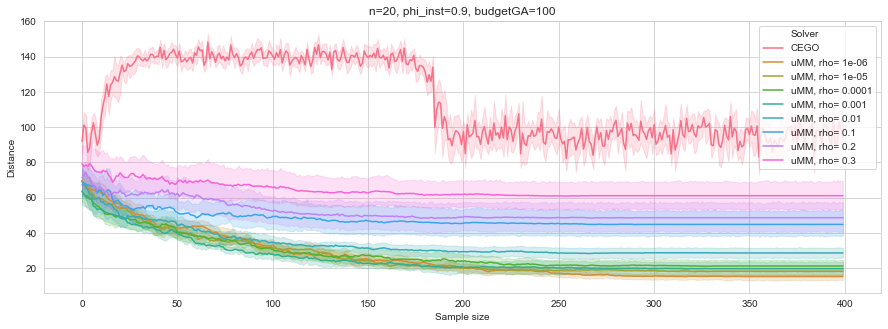

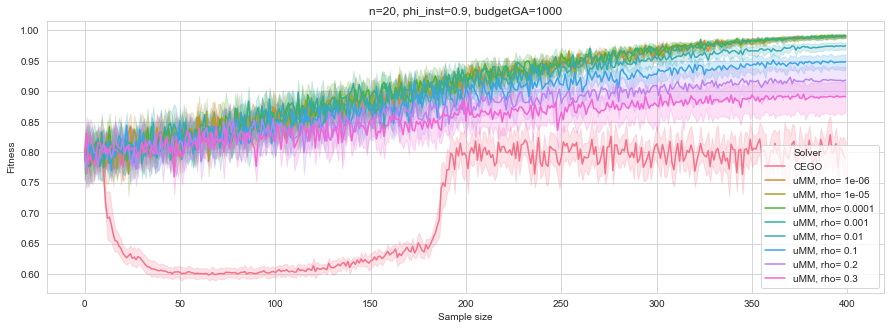

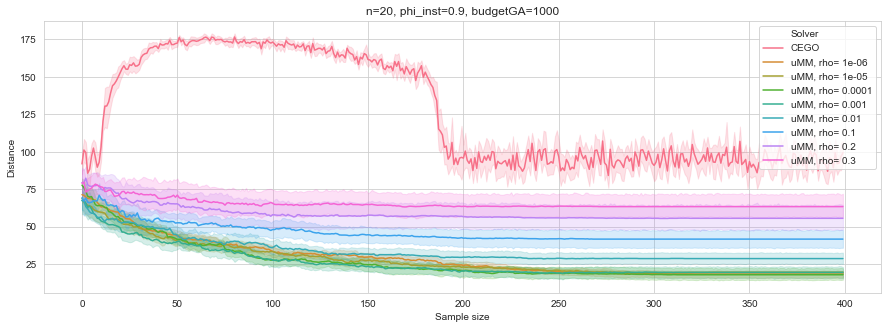

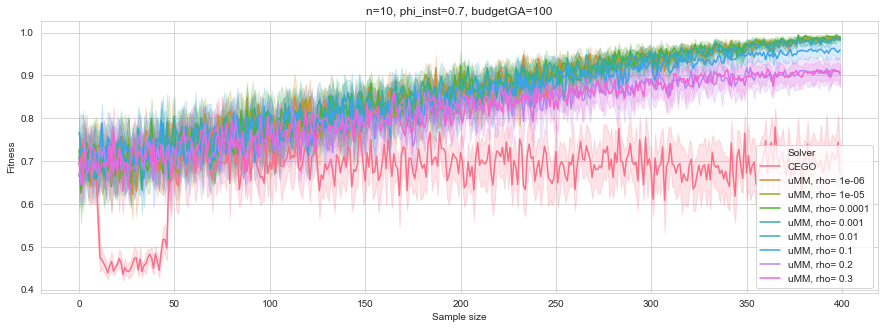

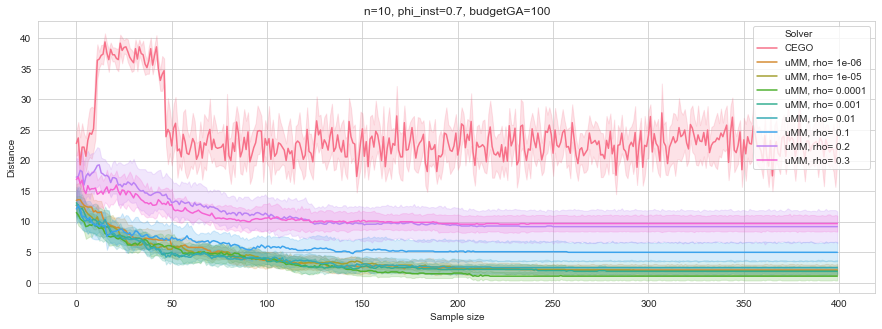

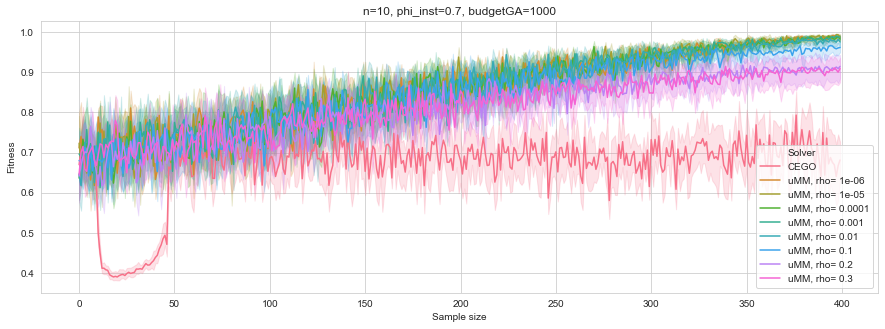

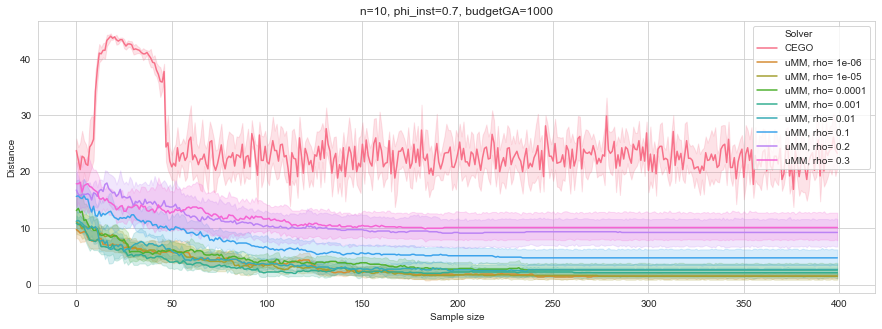

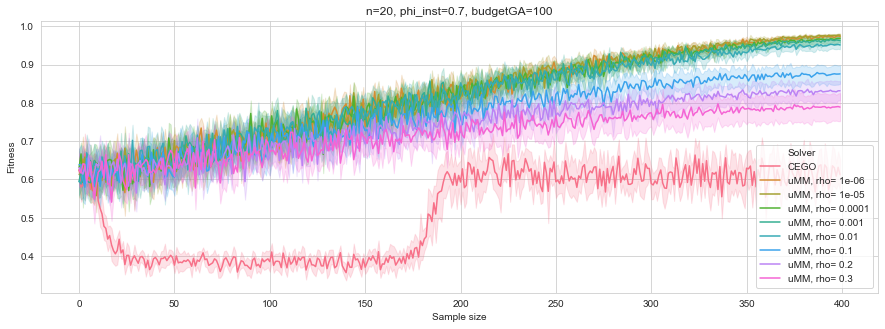

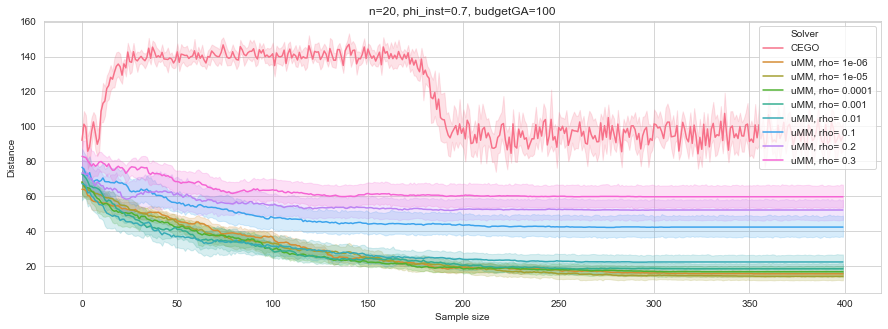

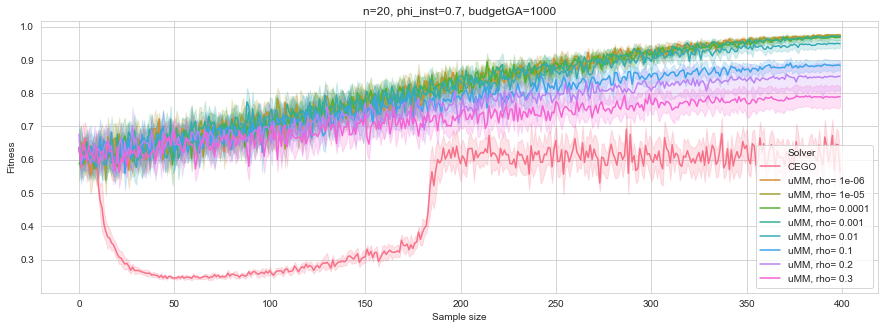

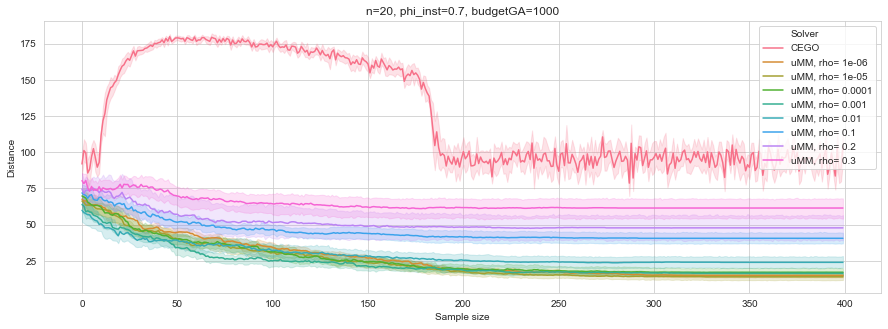

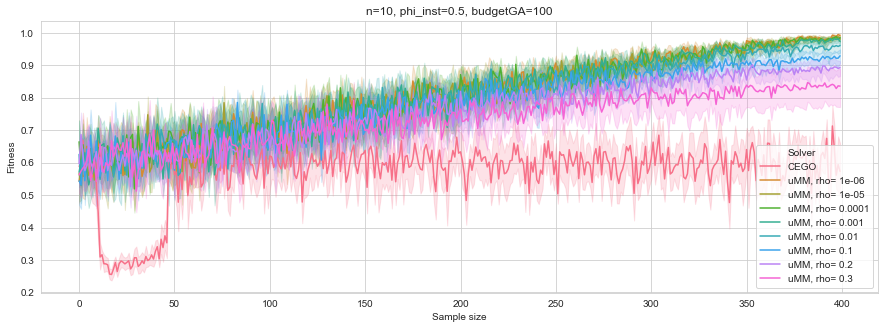

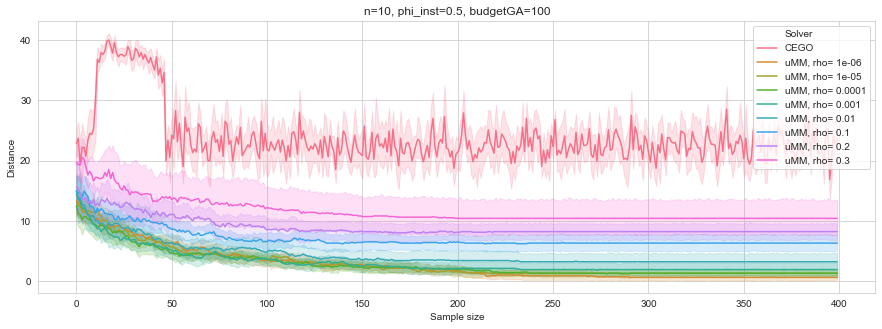

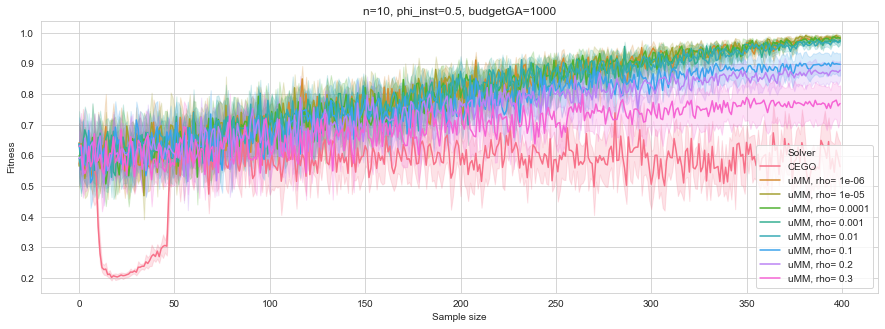

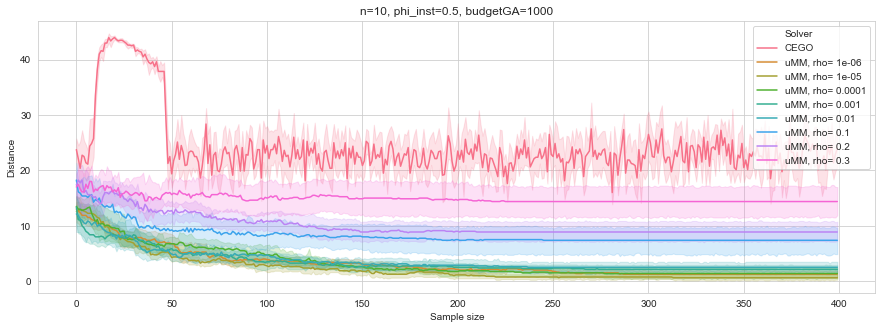

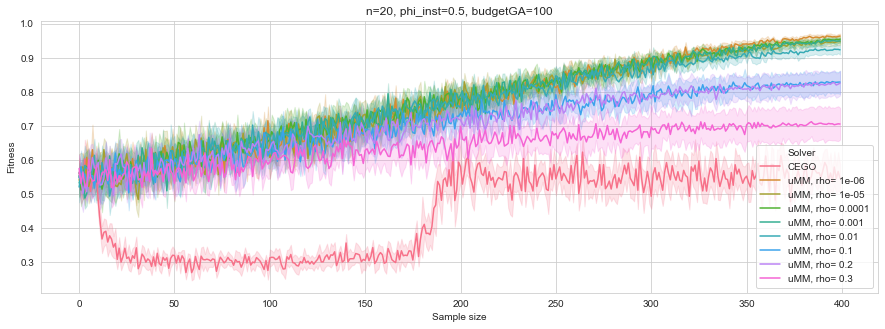

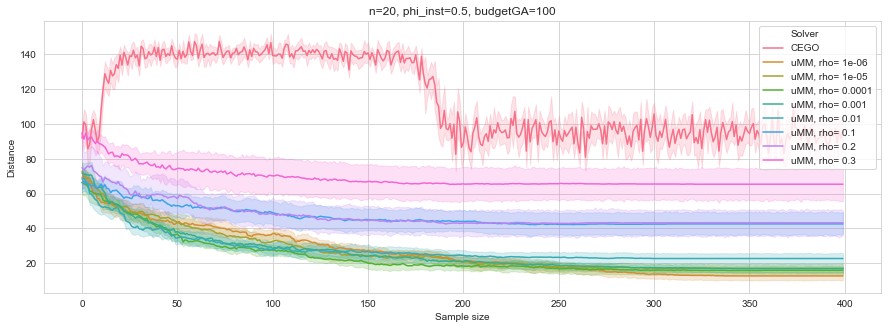

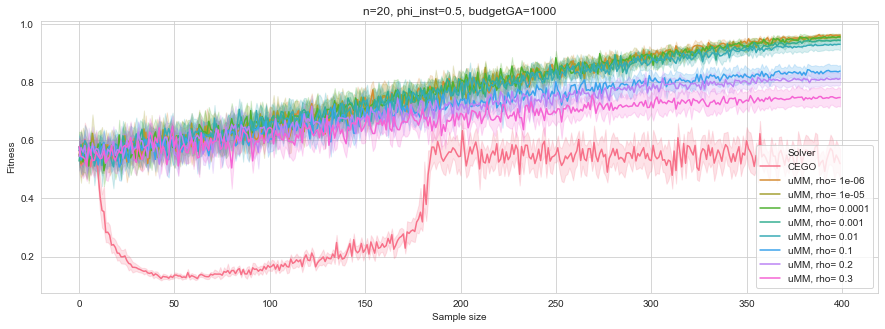

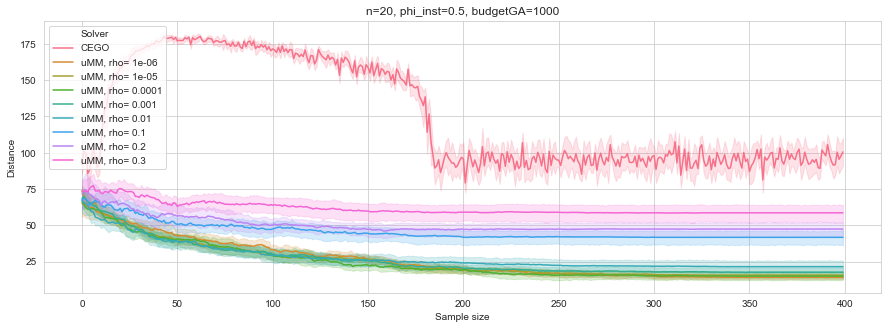

In [14]:
sns.set_style("whitegrid")
color_variable = 'Solver'
y_variables = ['Fitness','Distance']
palette = sns.color_palette("husl", len(df[color_variable].drop_duplicates()))
for phi_i in df.phi_instance.drop_duplicates().values:
  for n in df.n.drop_duplicates().values:
    for budgetGA in df.budgetGA.drop_duplicates().values:
      for y_variable in y_variables:
          plt.figure(figsize=(15,5))
          aux = df[(df.phi_instance==phi_i) & (df.n==n) & (df.budgetGA==budgetGA)] #& (df.repe==0)
          g = sns.lineplot(x='Sample size',y=y_variable,hue='Solver',data=aux, palette=palette)
          namestr = 'n='+str(n)+', phi_inst='+str(phi_i)+', budgetGA='+str(budgetGA)
          g.set_title(namestr)
          plt.savefig("img/"+y_variable+"_"+namestr+".jpg")
          plt.show()
       

# Running times

In [18]:
phi_i, n, budgetGA = 0.9,10,1000
df[(df.phi_instance==phi_i) & (df.n==n) & (df.budgetGA==budgetGA) ].repe.unique()
df = pd.read_pickle("pickles/pick282522.pkl")
df

Fitness Problem         Solver  Sample size  repe  Distance  \
0    0.665983     LOP           CEGO            0     0        72   
1    0.469618     LOP           CEGO            1     0       108   
2    0.556589     LOP           CEGO            2     0        92   
3    0.498859     LOP           CEGO            3     0       102   
4    0.526713     LOP           CEGO            4     0        99   
..        ...     ...            ...          ...   ...       ...   
395  0.688289     LOP  uMM, rho= 0.3          395     0        70   
396  0.683551     LOP  uMM, rho= 0.3          396     0        70   
397  0.678754     LOP  uMM, rho= 0.3          397     0        70   
398  0.688289     LOP  uMM, rho= 0.3          398     0        70   
399  0.682684     LOP  uMM, rho= 0.3          399     0        70   

         run_time  rho  phi_estim  phi_sample  best_known  worst_known  \
0    87384.429886  NaN        NaN         NaN     34609.0       3391.0   
1    87384.429886  NaN        NaN         NaN     34609.0       3391.0   
2    87384.429886  NaN        NaN         NaN     34609.0       3391.0   
3    87384.429886  NaN        NaN         NaN     34609.0       3391.0   
4    87384.429886  NaN        NaN         NaN     34609.0       3391.0   
..            ...  ...        ...         ...         ...          ...   
395     22.163945  0.3   0.776563     0.06250     34609.0       3391.0   
396     22.163945  0.3   0.775790     0.06250     34609.0       3391.0   
397     22.163945  0.3   0.775043     0.06250     34609.0       3391.0   
398     22.163945  0.3   0.774322     0.03125     34609.0       3391.0   
399     22.163945  0.3   0.773555     0.03125     34609.0       3391.0   

     phi_instance  budgetGA   n  
0             0.5      1000  20  
1             0.5      1000  20  
2             0.5      1000  20  
3             0.5      1000  20  
4             0.5      1000  20  
..            ...       ...  ..  
395           0.5      1000  20  
396           0.5      1000  20  
397           0.5      1000  20  
398           0.5      1000  20  
399           0.5      1000  20  

[3600 rows x 15 columns]

In [15]:
aux = df[['Solver','run_time','n','budgetGA']].drop_duplicates().copy()
aux.loc[aux.Solver.str.contains("uMM"),'Solver'] = "uMM"
aux.groupby(['Solver','n','budgetGA']).mean()/3600

run_time
Solver n  budgetGA           
CEGO   10 100        2.305674
          1000       6.867011
       20 100        4.385581
          1000      23.406106
uMM    10 100        0.004871
          1000       0.001678
       20 100        0.009515
          1000       0.006368

# Effect of increasing budget in GA

- the performance decreases with the budget
- better results for uniform that for easy, does it do enything?
- why that drop in the 20th iteration?


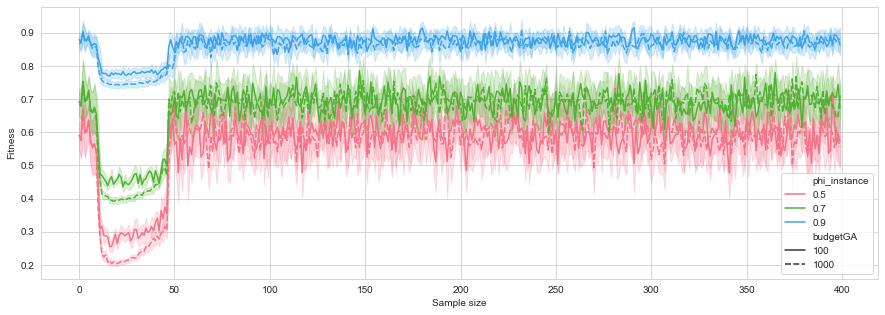

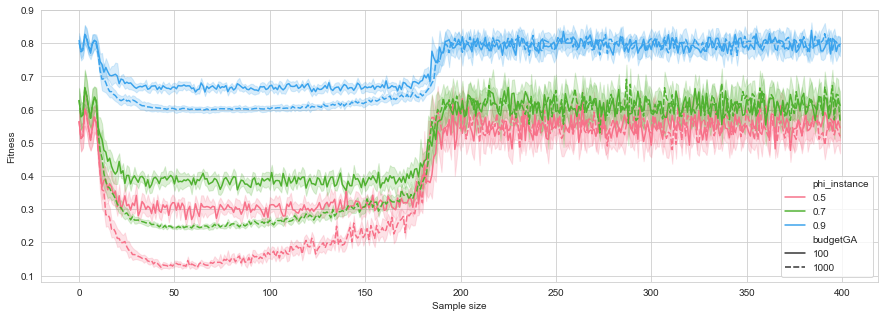

In [56]:
aux = df[df.Solver=='CEGO']
#aux = aux.groupby(['phi_instance','budgetGA','Sample size'])['Fitness'].mean().reset_index()##.plot()
aux##[aux.budgetGA==100]g = sns.lineplot(x='Sample size',y=y_variable,hue='Solver',data=aux, palette=palette)
palette = sns.color_palette("husl", 3)
plt.figure(figsize=(15,5))
sns.lineplot(x='Sample size',y='Fitness', style='budgetGA',hue='phi_instance', data=aux[aux.n==10], palette=palette)#ci=None, 
plt.figure(figsize=(15,5))
sns.lineplot(x='Sample size',y='Fitness', style='budgetGA',hue='phi_instance', data=aux[aux.n==20], palette=palette)#ci=None, 

# Do similar permutations have similar fitness?
In this experiment we analyse the relation between similarity in Kendall distance and in fitness funtion evaluation in the LOP instances. The process is as follows:

do 100 times:

1. a,b = generate two u.a.r. permutations
3. $x = d(a,b)$
2. $y = |f(a) - f(b)|$
4. draw a point in $(x,y)$


We see that:
- close permutations have similar fitness
- distant permutations have high variance in fitness

Kriging assumptions:
- stationarity (yes)
- constant variogram (no)

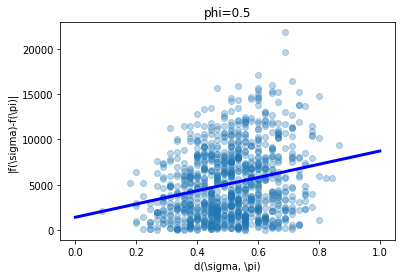

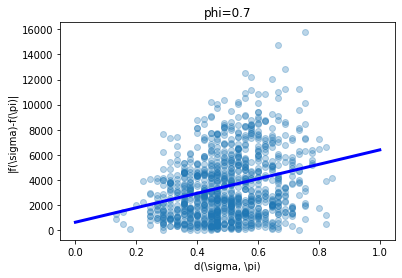

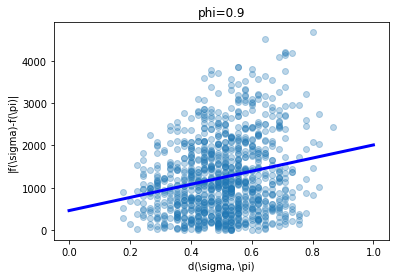

In [32]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
n = 10
for phi in [0.5,0.7,0.9]:
  instance = cego.synthetic_LOP(n,1000,phi)
  xs, ys = [],[]
  for repes in range(1000):
    a,b = np.random.permutation(range(n)),np.random.permutation(range(n))
    ys.append(abs(cego.get_fitness(a, instance,"LOP") - cego.get_fitness(b, instance,"LOP")))
    #xs.append(mk.kendallTau(np.argsort(a),np.argsort(b))) #similar
    xs.append(mk.kendallTau(a,b)/(n*(n-1)/2))
  plt.scatter(xs,ys,alpha=0.3)
  regr = linear_model.LinearRegression()
  regr.fit([[x] for x in xs], ys)
  pred = regr.predict([[x] for x in np.linspace(0,1)])
  plt.plot(np.linspace(0,1), pred, color='blue', linewidth=3)

  plt.ylabel(r'|f(\sigma)-f(\pi)|')
  plt.xlabel(r'd(\sigma, \pi)')
  plt.title("phi="+str(phi))
  plt.show()

# TODO
- meter más problemas: **PFSP**, TSP, ...
- comparar con otras alternativas: LS? 
- el símil con la optimización bayesiana no está claro, cómo se traslada aquí la función de utilidad?
- demostración de convergencia rápida 
- escribir draft para tener el modelo claro
- maximize (squarre) sum of distances for ini